In [1]:
# Import Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

# Regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.svm import SVR

### 1. Import Dataset 
Data Description:
* Collected undergraduate student applicant data from the Kansas State University Student Information System (KSIS) 
* Student applicant demographics
* Years: 2012 through 2019

Data Fields:
> * ID: equivalent to primary key identifier
> * State: continental US States only
> * Age 
> * Gender
> * Citizenship: As disclosed by student during application process; for US students populated with 'US'
> * Ethnicity: as given by student during application process
> * Residency: IS = In-State (KS); OS = Out of State (non-KS)
> * Admit Term
> * College: college and program that student has applied to
> * Degree / Non-Degree: status of application for degree program vs. non-degree program (e.g. certificate)
> * Application Center: K-State campust to which student has applied
> * Admit Type: traditional freshmen, re-admits, online students, or transfer students
> * Status: current status of student's application / program 
> * Application Date: date when application was submitted to / received by K-State
> * Admit Status: derived from now deleted column 'Admit Date', which if exists = 'Admitted', otherwise: 'Not Admitted'
> * Enrolled Status: derived from now deleted column 'Enrollment Date', which if exists = 'Enrolled', otherwise: 'Not Enrolled'
> * Withdrew?: did the student at any point withdraw after having been admitted

Pre-Processing Steps:
* Data pre-cleaned via Excel:
> * Verified data consistency, integrity, and accuracy
> * Deleted identifing information and non-demographic data
> * Original 182 data points reduced to 17

In [2]:
# Read and save master data file to continue processing
stdnt_data = pd.read_excel('Student Data 2012 - 2019.xlsx')
stdnt_data.head()

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70.0,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N
1,921672,CA,69.0,M,US,White,OS,Fall 2019,Agriculture,Non-Degree,Global Campus,Online,Active,2019-07-25,Admitted,Not Enrolled,N
2,922050,KS,67.0,M,US,White,IS,Fall 2019,Technology & Aviation,Non-Degree,Polytechnic,Freshman,Active,2019-08-05,Admitted,Enrolled,N
3,922182,KS,63.0,F,US,White,IS,Fall 2019,Health & Human Sciences,Non-Degree,Global Campus,Transfer,Active,2019-08-07,Admitted,Not Enrolled,N
4,905009,KS,63.0,M,US,White,IS,Fall 2019,Arts & Sciences,Degree,Manhattan Main Campus,Readmit,Active,2019-05-21,Admitted,Enrolled,N


### 2. Data Transformation and Cleaning

In [3]:
# Verify data types in file
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                101086 non-null  object        
 2   Age                  111614 non-null  float64       
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

> Looking at the counts we can see that there are some null values in the 'State' and 'Age' columns.

In [4]:
# Fill cells with null values 
stdnt_data = stdnt_data.fillna({'State':'No State'})

In [5]:
# Find mean age to fill null value(s)
stdnt_data['Age'].mean()

20.38497858691562

In [6]:
# Replace null values with mean age (rounded)
stdnt_data = stdnt_data.fillna({'Age':20})

In [7]:
#Verify no remaining null values
stdnt_data.isnull().sum()

ID                     0
State                  0
Age                    0
Gender                 0
Citizenship            0
Ethnicity              0
Residency              0
Admit Term             0
College                0
Degree / Non-Degree    0
Application Center     0
Admit Type             0
Status                 0
Application Date       0
Admit Status           0
Enrolled Status        0
Withdrew?              0
dtype: int64

In [8]:
# Change data type of age from float to int; this removes the decimal
stdnt_data['Age'] = stdnt_data['Age'].astype('int64')
stdnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111615 entries, 0 to 111614
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   111615 non-null  int64         
 1   State                111615 non-null  object        
 2   Age                  111615 non-null  int64         
 3   Gender               111615 non-null  object        
 4   Citizenship          111615 non-null  object        
 5   Ethnicity            111615 non-null  object        
 6   Residency            111615 non-null  object        
 7   Admit Term           111615 non-null  object        
 8   College              111615 non-null  object        
 9   Degree / Non-Degree  111615 non-null  object        
 10  Application Center   111615 non-null  object        
 11  Admit Type           111615 non-null  object        
 12  Status               111615 non-null  object        
 13  Application Da

In [9]:
stdnt_data.head(1)

,ID,State,Age,Gender,Citizenship,Ethnicity,Residency,Admit Term,College,Degree / Non-Degree,Application Center,Admit Type,Status,Application Date,Admit Status,Enrolled Status,Withdrew?
0,132441,KS,70,M,US,African American,IS,Fall 2019,Health & Human Sciences,Degree,Global Campus,Online,Cancelled,2019-05-16,Admitted,Not Enrolled,N


In [10]:
# Basic statistics of numeric column 'Age'
stdnt_data['Age'].describe()

count    111615.000000
mean         20.384975
std           5.276311
min          13.000000
25%          18.000000
50%          18.000000
75%          20.000000
max          80.000000
Name: Age, dtype: float64

> This basic statistical overview of age, shows us that we have a minimum age value of 13. While we may find during later analysis that this inaccurate, at this time, since we have high school admit types, we will assume it is in fact an accurate depiction of age for an applicant. Therefore we will keep this and not make any changes at this time. 

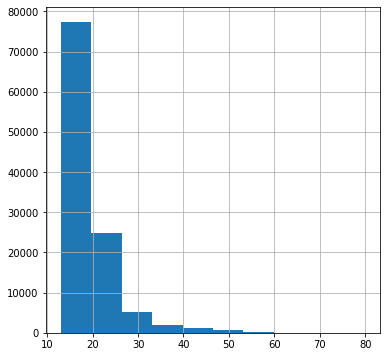

In [11]:
# Histogram of age distribution
stdnt_data['Age'].hist(figsize=(6,6))

> This visual shows that majority of students are around the age of 20 which agrees with our mean age of 20.38 years.

### 3. Verify Data Accuracy and Integrity
> Use of Group By to allow for quick overview of counts

In [12]:
# Grouping by admit status and enrolled status allows for counts and checking for inaccuracies;
# Students who are not admitted should not show as 'Enrolled'; 
Adm_Enrolled = stdnt_data.groupby(['Admit Status', 'Enrolled Status']).size()
Adm_Enrolled

Admit Status  Enrolled Status
Admitted      Enrolled           51151
              Not Enrolled       55255
Not Admitted  Not Enrolled        5209
dtype: int64

> Results show that we have indeed no enrollments for non-admits

In [13]:
# Ensuring no withdrawals for non-admits
Adm_Withdr = stdnt_data.groupby(['Admit Status', 'Withdrew?']).size()
Adm_Withdr

Admit Status  Withdrew?
Admitted      N            105536
              Y               870
Not Admitted  N              5209
dtype: int64

> Results show that we have no withdrawals for non-admits and a total of 870 withdrawals for previously admitted students

### We now have a dataset that no longer contains any null values. The validity of the data has been verified by looking at groupings and counts and we can proceed with further analysis. 